# Sentdex: Neural Networks and Deep Learning 7: Training on the GPU

  1%|▍                                                                             | 74/12501 [00:00<00:16, 737.94it/s]

PetImages/Cat


  1%|▍                                                                             | 69/12501 [00:00<00:18, 688.38it/s]

PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:17<00:00, 733.24it/s]
C:\Users\aseem\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Cats: 12476
Dogs: 12470
24946
[array([[ 69,  70,  74, ...,  73,  74,  76],
        [ 65,  65,  72, ...,  68,  73,  74],
        [ 63,  64,  65, ...,  64,  71,  74],
        ...,
        [167, 168, 172, ..., 192, 193, 191],
        [170, 173, 174, ..., 193, 195, 194],
        [170, 171, 174, ..., 192, 194, 191]], dtype=uint8) array([1., 0.])]
torch.Size([128, 2, 2])
2494
22452
2494


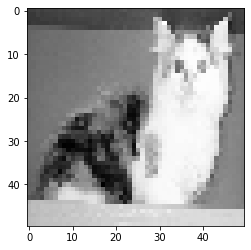

In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True 

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

training_data = np.load("training_data.npy", allow_pickle = True)

print(len(training_data))

print(training_data[1])

import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap="gray")
plt.show

training_data[1][1]

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)
        
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)
        
    def convs(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        
        print(x[0].shape)
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
net = Net()    



import torch.optim as optim

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT =0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)



train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))



BATCH_SIZE = 100
EPOCHS = 1

def train(net):
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
            #print(f"{i}:{i+BATCH_SIZE}")
            batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
            batch_y = train_y[i:i+BATCH_SIZE]

            net.zero_grad()

            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()    # Does the update

        print(f"Epoch: {epoch}. Loss: {loss}")    


        
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i])
            net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list, 
            predicted_class = torch.argmax(net_out)

            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accuracy: ", round(correct/total, 3))

In [6]:
train(net)

  0%|▎                                                                                 | 1/225 [00:00<00:48,  4.61it/s]

torch.Size([128, 2, 2])


  1%|▋                                                                                 | 2/225 [00:00<00:48,  4.58it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▍                                                                                | 4/225 [00:00<00:46,  4.78it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

  2%|█▊                                                                                | 5/225 [00:01<00:45,  4.83it/s]

  3%|██▏                                                                               | 6/225 [00:01<00:46,  4.72it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  4%|██▉                                                                               | 8/225 [00:01<00:47,  4.60it/s]

torch.Size([128, 2, 2])


  4%|███▎                                                                              | 9/225 [00:01<00:49,  4.33it/s]

torch.Size([128, 2, 2])


  4%|███▌                                                                             | 10/225 [00:02<00:49,  4.31it/s]

torch.Size([128, 2, 2])


  5%|███▉                                                                             | 11/225 [00:02<00:49,  4.32it/s]

torch.Size([128, 2, 2])


  5%|████▎                                                                            | 12/225 [00:02<00:48,  4.39it/s]

torch.Size([128, 2, 2])


  6%|████▋                                                                            | 13/225 [00:02<00:48,  4.36it/s]

torch.Size([128, 2, 2])


  6%|█████                                                                            | 14/225 [00:03<00:47,  4.41it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  7%|█████▊                                                                           | 16/225 [00:03<00:44,  4.69it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  8%|██████▍                                                                          | 18/225 [00:03<00:43,  4.75it/s]

torch.Size([128, 2, 2])


  8%|██████▊                                                                          | 19/225 [00:04<00:43,  4.75it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

  9%|███████▏                                                                         | 20/225 [00:04<00:43,  4.76it/s]

  9%|███████▌                                                                         | 21/225 [00:04<00:43,  4.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 10%|███████▉                                                                         | 22/225 [00:04<00:42,  4.81it/s]

 10%|████████▎                                                                        | 23/225 [00:04<00:42,  4.79it/s]

torch.Size([128, 2, 2])


 11%|████████▋                                                                        | 24/225 [00:05<00:42,  4.70it/s]

torch.Size([128, 2, 2])


 11%|█████████                                                                        | 25/225 [00:05<00:42,  4.71it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 12%|█████████▋                                                                       | 27/225 [00:05<00:43,  4.59it/s]

torch.Size([128, 2, 2])


 12%|██████████                                                                       | 28/225 [00:06<00:42,  4.63it/s]

torch.Size([128, 2, 2])


 13%|██████████▍                                                                      | 29/225 [00:06<00:42,  4.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 14%|███████████▏                                                                     | 31/225 [00:06<00:42,  4.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 15%|███████████▉                                                                     | 33/225 [00:07<00:40,  4.79it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 15%|████████████▏                                                                    | 34/225 [00:07<00:39,  4.84it/s]

 16%|████████████▌                                                                    | 35/225 [00:07<00:38,  4.88it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 16%|█████████████▎                                                                   | 37/225 [00:07<00:38,  4.89it/s]

torch.Size([128, 2, 2])


 17%|█████████████▋                                                                   | 38/225 [00:08<00:38,  4.92it/s]

torch.Size([128, 2, 2])


 17%|██████████████                                                                   | 39/225 [00:08<00:37,  4.92it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 18%|██████████████▊                                                                  | 41/225 [00:08<00:37,  4.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 19%|███████████████▍                                                                 | 43/225 [00:09<00:36,  4.94it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|████████████████▏                                                                | 45/225 [00:09<00:37,  4.83it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 21%|████████████████▉                                                                | 47/225 [00:09<00:36,  4.83it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 21%|█████████████████▎                                                               | 48/225 [00:10<00:36,  4.87it/s]

 22%|█████████████████▋                                                               | 49/225 [00:10<00:36,  4.76it/s]

torch.Size([128, 2, 2])


 22%|██████████████████                                                               | 50/225 [00:10<00:37,  4.62it/s]

torch.Size([128, 2, 2])


 23%|██████████████████▎                                                              | 51/225 [00:10<00:38,  4.53it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|███████████████████                                                              | 53/225 [00:11<00:36,  4.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|███████████████████▊                                                             | 55/225 [00:11<00:37,  4.56it/s]

torch.Size([128, 2, 2])


 25%|████████████████████▏                                                            | 56/225 [00:11<00:37,  4.48it/s]

torch.Size([128, 2, 2])


 25%|████████████████████▌                                                            | 57/225 [00:12<00:37,  4.50it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 26%|█████████████████████▏                                                           | 59/225 [00:12<00:35,  4.62it/s]

torch.Size([128, 2, 2])


 27%|█████████████████████▌                                                           | 60/225 [00:12<00:36,  4.53it/s]

torch.Size([128, 2, 2])


 27%|█████████████████████▉                                                           | 61/225 [00:13<00:36,  4.46it/s]

torch.Size([128, 2, 2])


 28%|██████████████████████▎                                                          | 62/225 [00:13<00:36,  4.42it/s]

torch.Size([128, 2, 2])


 28%|██████████████████████▋                                                          | 63/225 [00:13<00:36,  4.46it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 29%|███████████████████████▍                                                         | 65/225 [00:13<00:35,  4.55it/s]

torch.Size([128, 2, 2])


 29%|███████████████████████▊                                                         | 66/225 [00:14<00:34,  4.60it/s]

torch.Size([128, 2, 2])


 30%|████████████████████████                                                         | 67/225 [00:14<00:34,  4.64it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 31%|████████████████████████▊                                                        | 69/225 [00:14<00:32,  4.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 31%|█████████████████████████▏                                                       | 70/225 [00:14<00:32,  4.81it/s]

 32%|█████████████████████████▌                                                       | 71/225 [00:15<00:33,  4.67it/s]

torch.Size([128, 2, 2])


 32%|█████████████████████████▉                                                       | 72/225 [00:15<00:32,  4.67it/s]

torch.Size([128, 2, 2])


 32%|██████████████████████████▎                                                      | 73/225 [00:15<00:32,  4.69it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 33%|███████████████████████████                                                      | 75/225 [00:16<00:30,  4.86it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 34%|███████████████████████████▋                                                     | 77/225 [00:16<00:32,  4.53it/s]

torch.Size([128, 2, 2])


 35%|████████████████████████████                                                     | 78/225 [00:16<00:33,  4.35it/s]

torch.Size([128, 2, 2])


 35%|████████████████████████████▍                                                    | 79/225 [00:16<00:33,  4.35it/s]

torch.Size([128, 2, 2])


 36%|████████████████████████████▊                                                    | 80/225 [00:17<00:32,  4.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 36%|█████████████████████████████▌                                                   | 82/225 [00:17<00:31,  4.61it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 37%|██████████████████████████████▏                                                  | 84/225 [00:18<00:29,  4.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 38%|██████████████████████████████▌                                                  | 85/225 [00:18<00:29,  4.81it/s]


torch.Size([128, 2, 2])


 39%|███████████████████████████████▎                                                 | 87/225 [00:18<00:28,  4.89it/s]

torch.Size([128, 2, 2])


 39%|███████████████████████████████▋                                                 | 88/225 [00:18<00:28,  4.78it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 40%|████████████████████████████████▍                                                | 90/225 [00:19<00:27,  4.83it/s]

torch.Size([128, 2, 2])


 40%|████████████████████████████████▊                                                | 91/225 [00:19<00:27,  4.87it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 41%|█████████████████████████████████▍                                               | 93/225 [00:19<00:28,  4.65it/s]

torch.Size([128, 2, 2])


 42%|█████████████████████████████████▊                                               | 94/225 [00:20<00:32,  4.00it/s]

torch.Size([128, 2, 2])


 42%|██████████████████████████████████▏                                              | 95/225 [00:20<00:31,  4.14it/s]

torch.Size([128, 2, 2])


 43%|██████████████████████████████████▌                                              | 96/225 [00:20<00:34,  3.76it/s]

torch.Size([128, 2, 2])


 43%|██████████████████████████████████▉                                              | 97/225 [00:21<00:35,  3.62it/s]

torch.Size([128, 2, 2])


 44%|███████████████████████████████████▎                                             | 98/225 [00:21<00:32,  3.94it/s]

torch.Size([128, 2, 2])


 44%|███████████████████████████████████▋                                             | 99/225 [00:21<00:30,  4.10it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 45%|███████████████████████████████████▉                                            | 101/225 [00:22<00:34,  3.57it/s]

torch.Size([128, 2, 2])


 45%|████████████████████████████████████▎                                           | 102/225 [00:22<00:32,  3.81it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 46%|████████████████████████████████████▌                                           | 103/225 [00:22<00:31,  3.89it/s]

torch.Size([128, 2, 2])


 47%|█████████████████████████████████████▎                                          | 105/225 [00:23<00:33,  3.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 48%|██████████████████████████████████████                                          | 107/225 [00:23<00:36,  3.26it/s]

torch.Size([128, 2, 2])


 48%|██████████████████████████████████████▍                                         | 108/225 [00:24<00:32,  3.56it/s]

torch.Size([128, 2, 2])


 48%|██████████████████████████████████████▊                                         | 109/225 [00:24<00:31,  3.70it/s]

torch.Size([128, 2, 2])


 49%|███████████████████████████████████████                                         | 110/225 [00:24<00:30,  3.80it/s]

torch.Size([128, 2, 2])


 49%|███████████████████████████████████████▍                                        | 111/225 [00:24<00:29,  3.81it/s]

torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▊                                        | 112/225 [00:25<00:29,  3.78it/s]

torch.Size([128, 2, 2])


 50%|████████████████████████████████████████▏                                       | 113/225 [00:25<00:29,  3.80it/s]

torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▌                                       | 114/225 [00:25<00:30,  3.64it/s]

torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▉                                       | 115/225 [00:25<00:28,  3.82it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▌                                      | 117/225 [00:26<00:25,  4.24it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 53%|██████████████████████████████████████████▎                                     | 119/225 [00:26<00:23,  4.59it/s]

torch.Size([128, 2, 2])


 53%|██████████████████████████████████████████▋                                     | 120/225 [00:26<00:22,  4.64it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 54%|███████████████████████████████████████████▍                                    | 122/225 [00:27<00:21,  4.87it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 55%|████████████████████████████████████████████                                    | 124/225 [00:27<00:20,  4.92it/s]

torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▍                                   | 125/225 [00:27<00:20,  4.94it/s]

torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▊                                   | 126/225 [00:28<00:20,  4.81it/s]

torch.Size([128, 2, 2])


 56%|█████████████████████████████████████████████▏                                  | 127/225 [00:28<00:21,  4.65it/s]

torch.Size([128, 2, 2])


 57%|█████████████████████████████████████████████▌                                  | 128/225 [00:28<00:21,  4.61it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 58%|██████████████████████████████████████████████▏                                 | 130/225 [00:29<00:20,  4.69it/s]

torch.Size([128, 2, 2])


 58%|██████████████████████████████████████████████▌                                 | 131/225 [00:29<00:19,  4.77it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 59%|███████████████████████████████████████████████▎                                | 133/225 [00:29<00:18,  4.86it/s]

torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████▋                                | 134/225 [00:29<00:18,  4.90it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 60%|████████████████████████████████████████████████▎                               | 136/225 [00:30<00:18,  4.93it/s]

torch.Size([128, 2, 2])


 61%|████████████████████████████████████████████████▋                               | 137/225 [00:30<00:18,  4.87it/s]

torch.Size([128, 2, 2])


 61%|█████████████████████████████████████████████████                               | 138/225 [00:30<00:18,  4.83it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 62%|█████████████████████████████████████████████████▊                              | 140/225 [00:31<00:17,  4.93it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 63%|██████████████████████████████████████████████████▏                             | 141/225 [00:31<00:17,  4.87it/s]


torch.Size([128, 2, 2])


 64%|██████████████████████████████████████████████████▊                             | 143/225 [00:31<00:16,  4.92it/s]

torch.Size([128, 2, 2])


 64%|███████████████████████████████████████████████████▏                            | 144/225 [00:31<00:16,  4.88it/s]

torch.Size([128, 2, 2])


 64%|███████████████████████████████████████████████████▌                            | 145/225 [00:32<00:16,  4.97it/s]

torch.Size([128, 2, 2])


 65%|███████████████████████████████████████████████████▉                            | 146/225 [00:32<00:15,  4.97it/s]

torch.Size([128, 2, 2])


 65%|████████████████████████████████████████████████████▎                           | 147/225 [00:32<00:15,  4.91it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 66%|████████████████████████████████████████████████████▉                           | 149/225 [00:32<00:15,  5.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 67%|█████████████████████████████████████████████████████▋                          | 151/225 [00:33<00:15,  4.92it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 68%|██████████████████████████████████████████████████████▍                         | 153/225 [00:33<00:14,  4.88it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 69%|███████████████████████████████████████████████████████                         | 155/225 [00:34<00:14,  4.93it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 70%|███████████████████████████████████████████████████████▊                        | 157/225 [00:34<00:13,  4.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 70%|████████████████████████████████████████████████████████▏                       | 158/225 [00:34<00:13,  4.83it/s]


torch.Size([128, 2, 2])


 71%|████████████████████████████████████████████████████████▉                       | 160/225 [00:35<00:18,  3.44it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 72%|█████████████████████████████████████████████████████████▌                      | 162/225 [00:36<00:18,  3.43it/s]

torch.Size([128, 2, 2])


 72%|█████████████████████████████████████████████████████████▉                      | 163/225 [00:36<00:18,  3.33it/s]

torch.Size([128, 2, 2])


 73%|██████████████████████████████████████████████████████████▎                     | 164/225 [00:36<00:17,  3.52it/s]

torch.Size([128, 2, 2])


 73%|██████████████████████████████████████████████████████████▋                     | 165/225 [00:36<00:16,  3.66it/s]

torch.Size([128, 2, 2])


 74%|███████████████████████████████████████████████████████████                     | 166/225 [00:37<00:15,  3.79it/s]

torch.Size([128, 2, 2])


 74%|███████████████████████████████████████████████████████████▍                    | 167/225 [00:37<00:14,  3.94it/s]

torch.Size([128, 2, 2])


 75%|███████████████████████████████████████████████████████████▋                    | 168/225 [00:37<00:14,  3.99it/s]

torch.Size([128, 2, 2])


 75%|████████████████████████████████████████████████████████████                    | 169/225 [00:37<00:14,  3.87it/s]

torch.Size([128, 2, 2])


 76%|████████████████████████████████████████████████████████████▍                   | 170/225 [00:38<00:13,  3.98it/s]

torch.Size([128, 2, 2])


 76%|████████████████████████████████████████████████████████████▊                   | 171/225 [00:38<00:13,  4.06it/s]

torch.Size([128, 2, 2])


 76%|█████████████████████████████████████████████████████████████▏                  | 172/225 [00:38<00:12,  4.17it/s]

torch.Size([128, 2, 2])


 77%|█████████████████████████████████████████████████████████████▌                  | 173/225 [00:38<00:12,  4.23it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 78%|██████████████████████████████████████████████████████████████▏                 | 175/225 [00:39<00:12,  4.02it/s]

torch.Size([128, 2, 2])


 78%|██████████████████████████████████████████████████████████████▌                 | 176/225 [00:39<00:11,  4.11it/s]

torch.Size([128, 2, 2])


 79%|██████████████████████████████████████████████████████████████▉                 | 177/225 [00:39<00:11,  4.16it/s]

torch.Size([128, 2, 2])


 79%|███████████████████████████████████████████████████████████████▎                | 178/225 [00:40<00:11,  4.25it/s]

torch.Size([128, 2, 2])


 80%|███████████████████████████████████████████████████████████████▋                | 179/225 [00:40<00:11,  4.11it/s]

torch.Size([128, 2, 2])


 80%|████████████████████████████████████████████████████████████████                | 180/225 [00:40<00:10,  4.20it/s]

torch.Size([128, 2, 2])


 80%|████████████████████████████████████████████████████████████████▎               | 181/225 [00:40<00:10,  4.30it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 81%|█████████████████████████████████████████████████████████████████               | 183/225 [00:41<00:09,  4.34it/s]

torch.Size([128, 2, 2])


 82%|█████████████████████████████████████████████████████████████████▍              | 184/225 [00:41<00:09,  4.33it/s]

torch.Size([128, 2, 2])


 82%|█████████████████████████████████████████████████████████████████▊              | 185/225 [00:41<00:09,  4.38it/s]

torch.Size([128, 2, 2])


 83%|██████████████████████████████████████████████████████████████████▏             | 186/225 [00:41<00:09,  4.14it/s]

torch.Size([128, 2, 2])


 83%|██████████████████████████████████████████████████████████████████▍             | 187/225 [00:42<00:09,  4.18it/s]

torch.Size([128, 2, 2])


 84%|██████████████████████████████████████████████████████████████████▊             | 188/225 [00:42<00:08,  4.23it/s]

torch.Size([128, 2, 2])


 84%|███████████████████████████████████████████████████████████████████▏            | 189/225 [00:42<00:08,  4.20it/s]

torch.Size([128, 2, 2])


 84%|███████████████████████████████████████████████████████████████████▌            | 190/225 [00:42<00:08,  4.28it/s]

torch.Size([128, 2, 2])


 85%|███████████████████████████████████████████████████████████████████▉            | 191/225 [00:43<00:07,  4.32it/s]

torch.Size([128, 2, 2])


 85%|████████████████████████████████████████████████████████████████████▎           | 192/225 [00:43<00:07,  4.36it/s]

torch.Size([128, 2, 2])


 86%|████████████████████████████████████████████████████████████████████▌           | 193/225 [00:43<00:07,  4.36it/s]

torch.Size([128, 2, 2])


 86%|████████████████████████████████████████████████████████████████████▉           | 194/225 [00:43<00:07,  4.39it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 87%|█████████████████████████████████████████████████████████████████████▋          | 196/225 [00:44<00:06,  4.31it/s]

torch.Size([128, 2, 2])


 88%|██████████████████████████████████████████████████████████████████████          | 197/225 [00:44<00:06,  4.36it/s]

torch.Size([128, 2, 2])


 88%|██████████████████████████████████████████████████████████████████████▍         | 198/225 [00:44<00:06,  4.36it/s]

torch.Size([128, 2, 2])


 88%|██████████████████████████████████████████████████████████████████████▊         | 199/225 [00:44<00:05,  4.38it/s]

torch.Size([128, 2, 2])


 89%|███████████████████████████████████████████████████████████████████████         | 200/225 [00:45<00:05,  4.43it/s]

torch.Size([128, 2, 2])


 89%|███████████████████████████████████████████████████████████████████████▍        | 201/225 [00:45<00:05,  4.37it/s]

torch.Size([128, 2, 2])


 90%|███████████████████████████████████████████████████████████████████████▊        | 202/225 [00:45<00:05,  4.32it/s]

torch.Size([128, 2, 2])


 90%|████████████████████████████████████████████████████████████████████████▏       | 203/225 [00:45<00:05,  4.32it/s]

torch.Size([128, 2, 2])


 91%|████████████████████████████████████████████████████████████████████████▌       | 204/225 [00:46<00:04,  4.38it/s]

torch.Size([128, 2, 2])


 91%|████████████████████████████████████████████████████████████████████████▉       | 205/225 [00:46<00:04,  4.34it/s]

torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▏      | 206/225 [00:46<00:04,  4.30it/s]

torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▌      | 207/225 [00:46<00:04,  4.30it/s]

torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▉      | 208/225 [00:47<00:03,  4.30it/s]

torch.Size([128, 2, 2])


 93%|██████████████████████████████████████████████████████████████████████████▎     | 209/225 [00:47<00:03,  4.31it/s]

torch.Size([128, 2, 2])


 93%|██████████████████████████████████████████████████████████████████████████▋     | 210/225 [00:47<00:03,  4.13it/s]

torch.Size([128, 2, 2])


 94%|███████████████████████████████████████████████████████████████████████████     | 211/225 [00:47<00:03,  4.14it/s]

torch.Size([128, 2, 2])


 94%|███████████████████████████████████████████████████████████████████████████▍    | 212/225 [00:47<00:03,  4.15it/s]

torch.Size([128, 2, 2])


 95%|███████████████████████████████████████████████████████████████████████████▋    | 213/225 [00:48<00:02,  4.23it/s]

torch.Size([128, 2, 2])


 95%|████████████████████████████████████████████████████████████████████████████    | 214/225 [00:48<00:02,  4.22it/s]

torch.Size([128, 2, 2])


 96%|████████████████████████████████████████████████████████████████████████████▍   | 215/225 [00:48<00:02,  3.79it/s]

torch.Size([128, 2, 2])


 96%|████████████████████████████████████████████████████████████████████████████▊   | 216/225 [00:49<00:02,  3.87it/s]

torch.Size([128, 2, 2])


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 217/225 [00:49<00:02,  3.80it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 219/225 [00:49<00:01,  3.44it/s]

torch.Size([128, 2, 2])


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 220/225 [00:50<00:01,  3.66it/s]

torch.Size([128, 2, 2])


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 221/225 [00:50<00:01,  3.84it/s]

torch.Size([128, 2, 2])


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 222/225 [00:50<00:00,  3.97it/s]

torch.Size([128, 2, 2])


 99%|███████████████████████████████████████████████████████████████████████████████▎| 223/225 [00:50<00:00,  4.19it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:51<00:00,  4.40it/s]

torch.Size([128, 2, 2])
Epoch: 0. Loss: 0.23143911361694336


* Checking is the GPU is available to use.

In [7]:
test(net)

  0%|                                                                                         | 0/2494 [00:00<?, ?it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

  2%|█▎                                                                             | 43/2494 [00:00<00:05, 427.49it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

  3%|██▋                                                                            | 86/2494 [00:00<00:05, 427.56it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|████                                                                          | 129/2494 [00:00<00:05, 427.79it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

  7%|█████▍                                                                        | 172/2494 [00:00<00:05, 427.92it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  9%|██████▊                                                                       | 218/2494 [00:00<00:05, 438.77it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 11%|████████▎                                                                     | 264/2494 [00:00<00:05, 445.05it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 13%|█████████▊                                                                    | 313/2494 [00:00<00:04, 459.02it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 15%|███████████▎                                                                  | 363/2494 [00:00<00:04, 471.33it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 17%|████████████▉                                                                 | 413/2494 [00:00<00:04, 479.42it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 18%|██████████████▍                                                               | 461/2494 [00:01<00:04, 478.94it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|███████████████▉                                                              | 509/2494 [00:01<00:04, 464.35it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 22%|█████████████████▍                                                            | 556/2494 [00:01<00:04, 441.46it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 24%|██████████████████▊                                                           | 601/2494 [00:01<00:04, 440.72it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 26%|████████████████████▎                                                         | 650/2494 [00:01<00:04, 454.41it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 28%|█████████████████████▊                                                        | 699/2494 [00:01<00:03, 464.19it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 30%|███████████████████████▎                                                      | 746/2494 [00:01<00:03, 439.27it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 33%|██████████████████████████                                                    | 835/2494 [00:01<00:03, 431.72it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 35%|███████████████████████████▍                                                  | 879/2494 [00:01<00:03, 423.73it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 37%|████████████████████████████▉                                                 | 924/2494 [00:02<00:03, 430.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 39%|██████████████████████████████▍                                               | 974/2494 [00:02<00:03, 450.20it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 41%|███████████████████████████████▍                                             | 1020/2494 [00:02<00:03, 449.85it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 43%|████████████████████████████████▉                                            | 1066/2494 [00:02<00:03, 439.16it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 45%|██████████████████████████████████▎                                          | 1111/2494 [00:02<00:03, 431.72it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 46%|███████████████████████████████████▊                                         | 1159/2494 [00:02<00:03, 442.44it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 50%|██████████████████████████████████████▌                                      | 1249/2494 [00:02<00:02, 445.28it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 52%|████████████████████████████████████████                                     | 1297/2494 [00:02<00:02, 454.94it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 54%|█████████████████████████████████████████▍                                   | 1343/2494 [00:03<00:03, 369.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 55%|██████████████████████████████████████████▋                                  | 1383/2494 [00:03<00:02, 377.22it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 57%|████████████████████████████████████████████                                 | 1429/2494 [00:03<00:02, 398.81it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 59%|█████████████████████████████████████████████▋                               | 1479/2494 [00:03<00:02, 426.19it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 61%|███████████████████████████████████████████████▏                             | 1527/2494 [00:03<00:02, 440.85it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 63%|████████████████████████████████████████████████▌                            | 1573/2494 [00:03<00:02, 443.19it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 65%|█████████████████████████████████████████████████▉                           | 1619/2494 [00:03<00:02, 436.94it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 67%|███████████████████████████████████████████████████▍                         | 1668/2494 [00:03<00:01, 451.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 69%|█████████████████████████████████████████████████████                        | 1717/2494 [00:03<00:01, 462.17it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 71%|██████████████████████████████████████████████████████▍                      | 1765/2494 [00:03<00:01, 466.83it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 73%|███████████████████████████████████████████████████████▉                     | 1813/2494 [00:04<00:01, 467.27it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 77%|██████████████████████████████████████████████████████████▉                  | 1910/2494 [00:04<00:01, 476.38it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 79%|████████████████████████████████████████████████████████████▍                | 1959/2494 [00:04<00:01, 479.77it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 81%|█████████████████████████████████████████████████████████████▉               | 2008/2494 [00:04<00:01, 468.16it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 82%|███████████████████████████████████████████████████████████████▍             | 2055/2494 [00:04<00:00, 454.64it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 84%|████████████████████████████████████████████████████████████████▊            | 2101/2494 [00:04<00:00, 455.55it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 86%|██████████████████████████████████████████████████████████████████▎          | 2148/2494 [00:04<00:00, 458.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 88%|███████████████████████████████████████████████████████████████████▋         | 2194/2494 [00:04<00:00, 458.65it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 90%|█████████████████████████████████████████████████████████████████████▏       | 2240/2494 [00:05<00:00, 435.20it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 92%|██████████████████████████████████████████████████████████████████████▌      | 2284/2494 [00:05<00:00, 421.45it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 93%|███████████████████████████████████████████████████████████████████████▊     | 2327/2494 [00:05<00:00, 411.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 95%|█████████████████████████████████████████████████████████████████████████▎   | 2373/2494 [00:05<00:00, 424.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 97%|██████████████████████████████████████████████████████████████████████████▊  | 2422/2494 [00:05<00:00, 442.64it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 99%|████████████████████████████████████████████████████████████████████████████▏| 2467/2494 [00:05<00:00, 431.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

100%|█████████████████████████████████████████████████████████████████████████████| 2494/2494 [00:05<00:00, 442.38it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
Accuracy:  0.593


In [8]:
torch.cuda.is_available()

False

* IF the GPU is available, setting that as the torch.device()

In [9]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU.")
else:
    device = torch.device("cpu")
    print("Running on the CPU.")

Running on the CPU.


* Counting the number of GPU's

In [10]:
torch.cuda.device_count()

0

* Throwing the net on the device (GPU)

In [11]:
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [12]:
net = Net().to(device)

torch.Size([128, 2, 2])


* Converting our 'train' function to use the torch.device() (GPU)
* IF run/trained on the GPU, the training time is much faster as compared to CPU, you can check the time in the tqdm progress bar, if it works properly

In [14]:
def train(net):
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    loss_function = nn.MSELoss()
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
            #print(f"{i}:{i+BATCH_SIZE}")
            batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
            batch_y = train_y[i:i+BATCH_SIZE]
            
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
                
            net.zero_grad()

            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()    # Does the update

        print(f"Epoch: {epoch}. Loss: {loss}")  

train(net)        

  0%|▎                                                                                 | 1/225 [00:00<00:50,  4.46it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  1%|█                                                                                 | 3/225 [00:00<00:47,  4.65it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▊                                                                                | 5/225 [00:01<00:48,  4.57it/s]

torch.Size([128, 2, 2])


  3%|██▏                                                                               | 6/225 [00:01<00:48,  4.48it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  4%|██▉                                                                               | 8/225 [00:01<00:48,  4.50it/s]

torch.Size([128, 2, 2])


  4%|███▎                                                                              | 9/225 [00:02<00:49,  4.38it/s]

torch.Size([128, 2, 2])


  4%|███▌                                                                             | 10/225 [00:02<00:49,  4.31it/s]

torch.Size([128, 2, 2])


  5%|███▉                                                                             | 11/225 [00:02<00:48,  4.43it/s]

torch.Size([128, 2, 2])


  5%|████▎                                                                            | 12/225 [00:02<00:47,  4.46it/s]

torch.Size([128, 2, 2])


  6%|████▋                                                                            | 13/225 [00:02<00:48,  4.36it/s]

torch.Size([128, 2, 2])


  6%|█████                                                                            | 14/225 [00:03<00:47,  4.40it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  7%|█████▊                                                                           | 16/225 [00:03<00:47,  4.44it/s]

torch.Size([128, 2, 2])


  8%|██████                                                                           | 17/225 [00:03<00:47,  4.41it/s]

torch.Size([128, 2, 2])


  8%|██████▍                                                                          | 18/225 [00:04<00:46,  4.49it/s]

torch.Size([128, 2, 2])


  8%|██████▊                                                                          | 19/225 [00:04<00:46,  4.44it/s]

torch.Size([128, 2, 2])


  9%|███████▏                                                                         | 20/225 [00:04<00:45,  4.53it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 10%|███████▉                                                                         | 22/225 [00:04<00:43,  4.70it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 10%|████████▎                                                                        | 23/225 [00:05<00:42,  4.72it/s]


torch.Size([128, 2, 2])


 11%|█████████                                                                        | 25/225 [00:05<00:41,  4.77it/s]

torch.Size([128, 2, 2])


 12%|█████████▎                                                                       | 26/225 [00:05<00:41,  4.76it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 12%|█████████▋                                                                       | 27/225 [00:05<00:41,  4.75it/s]

 12%|██████████                                                                       | 28/225 [00:06<00:42,  4.68it/s]

torch.Size([128, 2, 2])


 13%|██████████▍                                                                      | 29/225 [00:06<00:42,  4.57it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 14%|███████████▏                                                                     | 31/225 [00:06<00:41,  4.72it/s]

torch.Size([128, 2, 2])


 14%|███████████▌                                                                     | 32/225 [00:07<00:40,  4.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 15%|████████████▏                                                                    | 34/225 [00:07<00:40,  4.66it/s]

torch.Size([128, 2, 2])


 16%|████████████▌                                                                    | 35/225 [00:07<00:42,  4.49it/s]

torch.Size([128, 2, 2])


 16%|████████████▉                                                                    | 36/225 [00:07<00:42,  4.44it/s]

torch.Size([128, 2, 2])


 16%|█████████████▎                                                                   | 37/225 [00:08<00:43,  4.36it/s]

torch.Size([128, 2, 2])


 17%|█████████████▋                                                                   | 38/225 [00:08<00:44,  4.18it/s]

torch.Size([128, 2, 2])


 17%|██████████████                                                                   | 39/225 [00:08<00:43,  4.27it/s]

torch.Size([128, 2, 2])


 18%|██████████████▍                                                                  | 40/225 [00:08<00:42,  4.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 19%|███████████████                                                                  | 42/225 [00:09<00:40,  4.49it/s]

torch.Size([128, 2, 2])


 19%|███████████████▍                                                                 | 43/225 [00:09<00:41,  4.38it/s]

torch.Size([128, 2, 2])


 20%|███████████████▊                                                                 | 44/225 [00:09<00:40,  4.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 20%|████████████████▏                                                                | 45/225 [00:09<00:39,  4.62it/s]


torch.Size([128, 2, 2])

 20%|████████████████▌                                                                | 46/225 [00:10<00:38,  4.65it/s]

 21%|████████████████▉                                                                | 47/225 [00:10<00:38,  4.61it/s]

torch.Size([128, 2, 2])


 21%|█████████████████▎                                                               | 48/225 [00:10<00:38,  4.60it/s]

torch.Size([128, 2, 2])


 22%|█████████████████▋                                                               | 49/225 [00:10<00:38,  4.63it/s]

torch.Size([128, 2, 2])


 22%|██████████████████                                                               | 50/225 [00:11<00:38,  4.53it/s]

torch.Size([128, 2, 2])


 23%|██████████████████▎                                                              | 51/225 [00:11<00:43,  4.03it/s]

torch.Size([128, 2, 2])


 23%|██████████████████▋                                                              | 52/225 [00:11<00:41,  4.17it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|███████████████████▍                                                             | 54/225 [00:11<00:37,  4.50it/s]

torch.Size([128, 2, 2])


 24%|███████████████████▊                                                             | 55/225 [00:12<00:37,  4.57it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 25%|████████████████████▏                                                            | 56/225 [00:12<00:36,  4.62it/s]

 25%|████████████████████▌                                                            | 57/225 [00:12<00:36,  4.65it/s]

torch.Size([128, 2, 2])


 26%|████████████████████▉                                                            | 58/225 [00:12<00:35,  4.68it/s]

torch.Size([128, 2, 2])


 26%|█████████████████████▏                                                           | 59/225 [00:13<00:35,  4.71it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 27%|█████████████████████▉                                                           | 61/225 [00:13<00:36,  4.44it/s]

torch.Size([128, 2, 2])


 28%|██████████████████████▎                                                          | 62/225 [00:13<00:38,  4.23it/s]

torch.Size([128, 2, 2])


 28%|██████████████████████▋                                                          | 63/225 [00:13<00:37,  4.37it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 29%|███████████████████████▍                                                         | 65/225 [00:14<00:36,  4.36it/s]

torch.Size([128, 2, 2])


 29%|███████████████████████▊                                                         | 66/225 [00:14<00:36,  4.35it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 30%|████████████████████████                                                         | 67/225 [00:14<00:34,  4.58it/s]


torch.Size([128, 2, 2])


 31%|████████████████████████▊                                                        | 69/225 [00:15<00:35,  4.45it/s]

torch.Size([128, 2, 2])


 31%|█████████████████████████▏                                                       | 70/225 [00:15<00:34,  4.47it/s]

torch.Size([128, 2, 2])


 32%|█████████████████████████▌                                                       | 71/225 [00:15<00:34,  4.43it/s]

torch.Size([128, 2, 2])


 32%|█████████████████████████▉                                                       | 72/225 [00:16<00:34,  4.45it/s]

torch.Size([128, 2, 2])


 32%|██████████████████████████▎                                                      | 73/225 [00:16<00:34,  4.43it/s]

torch.Size([128, 2, 2])


 33%|██████████████████████████▋                                                      | 74/225 [00:16<00:34,  4.42it/s]

torch.Size([128, 2, 2])


 33%|███████████████████████████                                                      | 75/225 [00:16<00:33,  4.45it/s]

torch.Size([128, 2, 2])


 34%|███████████████████████████▎                                                     | 76/225 [00:16<00:34,  4.38it/s]

torch.Size([128, 2, 2])


 34%|███████████████████████████▋                                                     | 77/225 [00:17<00:34,  4.25it/s]

torch.Size([128, 2, 2])


 35%|████████████████████████████                                                     | 78/225 [00:17<00:33,  4.39it/s]

torch.Size([128, 2, 2])


 35%|████████████████████████████▍                                                    | 79/225 [00:17<00:34,  4.20it/s]

torch.Size([128, 2, 2])


 36%|████████████████████████████▊                                                    | 80/225 [00:17<00:39,  3.69it/s]

torch.Size([128, 2, 2])


 36%|█████████████████████████████▏                                                   | 81/225 [00:18<00:36,  3.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 36%|█████████████████████████████▌                                                   | 82/225 [00:18<00:37,  3.76it/s]

torch.Size([128, 2, 2])


 37%|█████████████████████████████▉                                                   | 83/225 [00:19<00:49,  2.89it/s]

torch.Size([128, 2, 2])


 37%|██████████████████████████████▏                                                  | 84/225 [00:19<00:49,  2.83it/s]

torch.Size([128, 2, 2])


 38%|██████████████████████████████▌                                                  | 85/225 [00:19<00:48,  2.92it/s]

torch.Size([128, 2, 2])


 38%|██████████████████████████████▉                                                  | 86/225 [00:20<00:52,  2.66it/s]

torch.Size([128, 2, 2])


 39%|███████████████████████████████▎                                                 | 87/225 [00:20<00:54,  2.54it/s]

torch.Size([128, 2, 2])


 39%|███████████████████████████████▋                                                 | 88/225 [00:20<00:53,  2.55it/s]

torch.Size([128, 2, 2])


 40%|████████████████████████████████                                                 | 89/225 [00:21<00:52,  2.58it/s]

torch.Size([128, 2, 2])


 40%|████████████████████████████████▊                                                | 91/225 [00:21<00:45,  2.92it/s]

torch.Size([128, 2, 2])


 41%|█████████████████████████████████                                                | 92/225 [00:22<00:40,  3.25it/s]

torch.Size([128, 2, 2])


 41%|█████████████████████████████████▍                                               | 93/225 [00:22<00:37,  3.55it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 42%|█████████████████████████████████▊                                               | 94/225 [00:22<00:33,  3.91it/s]


torch.Size([128, 2, 2])


 43%|██████████████████████████████████▌                                              | 96/225 [00:23<00:29,  4.33it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 44%|███████████████████████████████████▎                                             | 98/225 [00:23<00:28,  4.53it/s]

torch.Size([128, 2, 2])


 44%|███████████████████████████████████▋                                             | 99/225 [00:23<00:27,  4.61it/s]

torch.Size([128, 2, 2])


 44%|███████████████████████████████████▌                                            | 100/225 [00:23<00:26,  4.64it/s]

torch.Size([128, 2, 2])


 45%|███████████████████████████████████▉                                            | 101/225 [00:24<00:28,  4.37it/s]

torch.Size([128, 2, 2])


 45%|████████████████████████████████████▎                                           | 102/225 [00:24<00:28,  4.29it/s]

torch.Size([128, 2, 2])


 46%|████████████████████████████████████▌                                           | 103/225 [00:24<00:27,  4.46it/s]

torch.Size([128, 2, 2])


 46%|████████████████████████████████████▉                                           | 104/225 [00:24<00:26,  4.48it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 47%|█████████████████████████████████████▋                                          | 106/225 [00:25<00:27,  4.31it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 48%|██████████████████████████████████████▍                                         | 108/225 [00:25<00:26,  4.46it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 49%|███████████████████████████████████████                                         | 110/225 [00:26<00:23,  4.82it/s]

torch.Size([128, 2, 2])


 49%|███████████████████████████████████████▍                                        | 111/225 [00:26<00:24,  4.71it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 50%|████████████████████████████████████████▏                                       | 113/225 [00:26<00:22,  4.88it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▉                                       | 115/225 [00:27<00:22,  4.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▌                                      | 117/225 [00:27<00:21,  5.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 53%|██████████████████████████████████████████▎                                     | 119/225 [00:27<00:20,  5.06it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 54%|███████████████████████████████████████████                                     | 121/225 [00:28<00:20,  5.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 54%|███████████████████████████████████████████▍                                    | 122/225 [00:28<00:20,  5.04it/s]


torch.Size([128, 2, 2])


 55%|████████████████████████████████████████████                                    | 124/225 [00:28<00:20,  5.02it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▊                                   | 126/225 [00:29<00:19,  5.07it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 57%|█████████████████████████████████████████████▌                                  | 128/225 [00:29<00:19,  4.85it/s]

torch.Size([128, 2, 2])


 57%|█████████████████████████████████████████████▊                                  | 129/225 [00:29<00:19,  4.90it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 58%|██████████████████████████████████████████████▏                                 | 130/225 [00:30<00:19,  4.93it/s]


torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▉                                 | 132/225 [00:30<00:18,  4.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████▋                                | 134/225 [00:30<00:18,  5.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 60%|████████████████████████████████████████████████▎                               | 136/225 [00:31<00:17,  5.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 61%|█████████████████████████████████████████████████                               | 138/225 [00:31<00:17,  4.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 62%|█████████████████████████████████████████████████▊                              | 140/225 [00:32<00:16,  5.03it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 63%|██████████████████████████████████████████████████▍                             | 142/225 [00:32<00:16,  5.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 64%|██████████████████████████████████████████████████▊                             | 143/225 [00:32<00:16,  5.01it/s]


torch.Size([128, 2, 2])


 64%|███████████████████████████████████████████████████▌                            | 145/225 [00:33<00:16,  4.98it/s]

torch.Size([128, 2, 2])


 65%|███████████████████████████████████████████████████▉                            | 146/225 [00:33<00:17,  4.58it/s]

torch.Size([128, 2, 2])


 65%|████████████████████████████████████████████████████▎                           | 147/225 [00:33<00:16,  4.62it/s]

torch.Size([128, 2, 2])


 66%|████████████████████████████████████████████████████▌                           | 148/225 [00:33<00:16,  4.76it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 67%|█████████████████████████████████████████████████████▎                          | 150/225 [00:34<00:15,  4.86it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 68%|██████████████████████████████████████████████████████                          | 152/225 [00:34<00:14,  4.91it/s]

torch.Size([128, 2, 2])


 68%|██████████████████████████████████████████████████████▍                         | 153/225 [00:34<00:14,  4.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 69%|███████████████████████████████████████████████████████                         | 155/225 [00:35<00:14,  4.94it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 70%|███████████████████████████████████████████████████████▊                        | 157/225 [00:35<00:13,  5.04it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 70%|████████████████████████████████████████████████████████▏                       | 158/225 [00:35<00:13,  5.06it/s]


torch.Size([128, 2, 2])


 71%|████████████████████████████████████████████████████████▉                       | 160/225 [00:36<00:12,  5.05it/s]

torch.Size([128, 2, 2])


 72%|█████████████████████████████████████████████████████████▏                      | 161/225 [00:36<00:12,  5.03it/s]

torch.Size([128, 2, 2])


 72%|█████████████████████████████████████████████████████████▌                      | 162/225 [00:36<00:12,  5.06it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 73%|██████████████████████████████████████████████████████████▎                     | 164/225 [00:37<00:13,  4.50it/s]

torch.Size([128, 2, 2])


 73%|██████████████████████████████████████████████████████████▋                     | 165/225 [00:37<00:12,  4.65it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 74%|███████████████████████████████████████████████████████████▍                    | 167/225 [00:37<00:12,  4.66it/s]

torch.Size([128, 2, 2])


 75%|███████████████████████████████████████████████████████████▋                    | 168/225 [00:37<00:12,  4.65it/s]

torch.Size([128, 2, 2])


 75%|████████████████████████████████████████████████████████████                    | 169/225 [00:38<00:12,  4.62it/s]

torch.Size([128, 2, 2])


 76%|████████████████████████████████████████████████████████████▍                   | 170/225 [00:38<00:11,  4.73it/s]

torch.Size([128, 2, 2])


 76%|████████████████████████████████████████████████████████████▊                   | 171/225 [00:38<00:12,  4.40it/s]

torch.Size([128, 2, 2])


 76%|█████████████████████████████████████████████████████████████▏                  | 172/225 [00:38<00:11,  4.47it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 77%|█████████████████████████████████████████████████████████████▊                  | 174/225 [00:39<00:10,  4.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 78%|██████████████████████████████████████████████████████████████▌                 | 176/225 [00:39<00:09,  4.95it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 79%|███████████████████████████████████████████████████████████████▎                | 178/225 [00:40<00:10,  4.65it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 80%|████████████████████████████████████████████████████████████████                | 180/225 [00:40<00:10,  4.32it/s]

torch.Size([128, 2, 2])


 80%|████████████████████████████████████████████████████████████████▎               | 181/225 [00:40<00:10,  4.30it/s]

torch.Size([128, 2, 2])


 81%|████████████████████████████████████████████████████████████████▋               | 182/225 [00:40<00:09,  4.33it/s]

torch.Size([128, 2, 2])


 81%|█████████████████████████████████████████████████████████████████               | 183/225 [00:41<00:09,  4.46it/s]

torch.Size([128, 2, 2])


 82%|█████████████████████████████████████████████████████████████████▍              | 184/225 [00:41<00:09,  4.26it/s]

torch.Size([128, 2, 2])


 82%|█████████████████████████████████████████████████████████████████▊              | 185/225 [00:41<00:08,  4.48it/s]

torch.Size([128, 2, 2])


 83%|██████████████████████████████████████████████████████████████████▏             | 186/225 [00:41<00:08,  4.34it/s]

torch.Size([128, 2, 2])


 83%|██████████████████████████████████████████████████████████████████▍             | 187/225 [00:42<00:08,  4.52it/s]

torch.Size([128, 2, 2])


 84%|██████████████████████████████████████████████████████████████████▊             | 188/225 [00:42<00:08,  4.34it/s]

torch.Size([128, 2, 2])


 84%|███████████████████████████████████████████████████████████████████▏            | 189/225 [00:42<00:07,  4.52it/s]

torch.Size([128, 2, 2])


 84%|███████████████████████████████████████████████████████████████████▌            | 190/225 [00:42<00:08,  4.32it/s]

torch.Size([128, 2, 2])


 85%|███████████████████████████████████████████████████████████████████▉            | 191/225 [00:43<00:07,  4.46it/s]

torch.Size([128, 2, 2])


 85%|████████████████████████████████████████████████████████████████████▎           | 192/225 [00:43<00:07,  4.32it/s]

torch.Size([128, 2, 2])


 86%|████████████████████████████████████████████████████████████████████▌           | 193/225 [00:43<00:07,  4.46it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 87%|█████████████████████████████████████████████████████████████████████▎          | 195/225 [00:43<00:06,  4.41it/s]

torch.Size([128, 2, 2])


 87%|█████████████████████████████████████████████████████████████████████▋          | 196/225 [00:44<00:06,  4.27it/s]

torch.Size([128, 2, 2])


 88%|██████████████████████████████████████████████████████████████████████          | 197/225 [00:44<00:06,  4.40it/s]

torch.Size([128, 2, 2])


 88%|██████████████████████████████████████████████████████████████████████▍         | 198/225 [00:44<00:06,  4.37it/s]

torch.Size([128, 2, 2])


 88%|██████████████████████████████████████████████████████████████████████▊         | 199/225 [00:44<00:05,  4.47it/s]

torch.Size([128, 2, 2])


 89%|███████████████████████████████████████████████████████████████████████         | 200/225 [00:45<00:05,  4.52it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 90%|███████████████████████████████████████████████████████████████████████▊        | 202/225 [00:45<00:04,  4.76it/s]

torch.Size([128, 2, 2])


 90%|████████████████████████████████████████████████████████████████████████▏       | 203/225 [00:45<00:04,  4.42it/s]

torch.Size([128, 2, 2])


 91%|████████████████████████████████████████████████████████████████████████▌       | 204/225 [00:46<00:05,  4.13it/s]

torch.Size([128, 2, 2])


 91%|████████████████████████████████████████████████████████████████████████▉       | 205/225 [00:46<00:04,  4.36it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▌      | 207/225 [00:46<00:04,  4.46it/s]

torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▉      | 208/225 [00:46<00:03,  4.61it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 93%|██████████████████████████████████████████████████████████████████████████▋     | 210/225 [00:47<00:03,  4.80it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 94%|███████████████████████████████████████████████████████████████████████████▍    | 212/225 [00:47<00:02,  4.89it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 95%|████████████████████████████████████████████████████████████████████████████    | 214/225 [00:48<00:02,  4.95it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 96%|████████████████████████████████████████████████████████████████████████████▍   | 215/225 [00:48<00:02,  4.97it/s]


torch.Size([128, 2, 2])


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 217/225 [00:48<00:01,  4.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 219/225 [00:49<00:01,  4.92it/s]

torch.Size([128, 2, 2])


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 220/225 [00:49<00:01,  4.86it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 222/225 [00:49<00:00,  4.91it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


100%|███████████████████████████████████████████████████████████████████████████████▋| 224/225 [00:50<00:00,  4.93it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:50<00:00,  4.48it/s]

Epoch: 0. Loss: 0.2289259135723114


In [15]:
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_X[i].view(-1, 1, 50, 50).to(device))[0]  # returns a list, 
            predicted_class = torch.argmax(net_out)

            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accuracy: ", round(correct/total, 3))

test(net)

  1%|█                                                                              | 35/2494 [00:00<00:07, 349.16it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

  5%|████                                                                          | 129/2494 [00:00<00:05, 440.27it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

  9%|███████                                                                       | 224/2494 [00:00<00:04, 458.37it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 13%|█████████▊                                                                    | 315/2494 [00:00<00:04, 444.59it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 14%|███████████▎                                                                  | 360/2494 [00:00<00:04, 432.09it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 18%|█████████████▉                                                                | 446/2494 [00:01<00:05, 378.66it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 19%|███████████████▏                                                              | 485/2494 [00:01<00:06, 305.25it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 21%|████████████████▏                                                             | 518/2494 [00:01<00:07, 261.76it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 22%|█████████████████                                                             | 547/2494 [00:01<00:09, 210.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 24%|███████████████████                                                           | 609/2494 [00:01<00:07, 251.84it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 26%|████████████████████                                                          | 641/2494 [00:01<00:06, 266.80it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 29%|██████████████████████▍                                                       | 717/2494 [00:02<00:05, 313.08it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 32%|█████████████████████████                                                     | 802/2494 [00:02<00:04, 364.15it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 35%|███████████████████████████▍                                                  | 879/2494 [00:02<00:04, 362.72it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 38%|█████████████████████████████▉                                                | 956/2494 [00:02<00:04, 372.24it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 40%|███████████████████████████████▏                                              | 998/2494 [00:02<00:03, 385.33it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 44%|█████████████████████████████████▍                                           | 1085/2494 [00:03<00:03, 408.21it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 47%|████████████████████████████████████▏                                        | 1172/2494 [00:03<00:03, 419.44it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 51%|██████████████████████████████████████▉                                      | 1261/2494 [00:03<00:02, 426.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 54%|█████████████████████████████████████████▌                                   | 1348/2494 [00:03<00:02, 430.78it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 58%|████████████████████████████████████████████▎                                | 1437/2494 [00:03<00:02, 433.38it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 61%|███████████████████████████████████████████████                              | 1525/2494 [00:04<00:02, 433.32it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 63%|████████████████████████████████████████████████▍                            | 1569/2494 [00:04<00:02, 424.16it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 66%|███████████████████████████████████████████████████▏                         | 1657/2494 [00:04<00:01, 429.59it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 70%|█████████████████████████████████████████████████████▊                       | 1744/2494 [00:04<00:01, 424.14it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 73%|████████████████████████████████████████████████████████▍                    | 1830/2494 [00:04<00:01, 423.28it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 77%|███████████████████████████████████████████████████████████                  | 1915/2494 [00:05<00:01, 414.12it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 78%|████████████████████████████████████████████████████████████▍                | 1957/2494 [00:05<00:01, 414.97it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 82%|███████████████████████████████████████████████████████████████▏             | 2045/2494 [00:05<00:01, 401.31it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 85%|█████████████████████████████████████████████████████████████████▌           | 2125/2494 [00:05<00:00, 384.29it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 89%|████████████████████████████████████████████████████████████████████▏        | 2210/2494 [00:05<00:00, 396.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 90%|█████████████████████████████████████████████████████████████████████▌       | 2253/2494 [00:05<00:00, 405.25it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 94%|████████████████████████████████████████████████████████████████████████▏    | 2338/2494 [00:06<00:00, 403.82it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 95%|█████████████████████████████████████████████████████████████████████████▍   | 2379/2494 [00:06<00:00, 373.07it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 98%|███████████████████████████████████████████████████████████████████████████▊ | 2454/2494 [00:06<00:00, 339.89it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

100%|█████████████████████████████████████████████████████████████████████████████| 2494/2494 [00:06<00:00, 376.27it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
Accuracy:  0.601
